# **TREES**

Trees can be used for both classification and regression, being a powerful prediction model.

# **1.THE ALGORITHM FOR CLASSIFICATION**

The algorithm underlying the creation of a classification tree is based on the idea of **recursively splitting the data into more homogenous subsets**.

For instance, if our problem is a one of binary classification, with classes A and B, the algorithm will try to split the data into subsets that are the purest possible, i.e., with only data points of class A or with only data points of class B.


There are several measures of **purity**. However, the most popular ones, in the context of trees, are the Gini index and the entropy. In our course, we will focus only on the **Gini index**.

GI => measure of statistical dispersion intended to represent the income inequality.

**FORMULA:**

Considering the outcome variable can be any class 𝑘, with 𝑘 = 1, ⋯ , 𝑚, this index, for a subset 𝑆, is given by the formula: 

`GI (S) = 1 - summation of 𝑘 = 1 until 𝑚 of the proportion of data points of class 𝑘 in the subset S.`

**PLOT:**

It is easy to plot the graph of the GI when 𝑚 = 2 (only two classes) - see notes.

As we can see from the plot, the GI is maximum when 𝑝 = 0.5, i.e., when there
is the same proportion of class A and B, and it is minimum when there is only one class (**maximum dispersion vs mininum dispersion**).

**NOTE:** When there is only a single class in one set (or subset), the GI will be always zero independently of the number of classes of the outcome variable, i.e., even when 𝑚 > 2.

Let's now consider the following tiny dataset, to illustrate how the algorithm works mannualy.

In [117]:
import pandas as pd

In [118]:
df = pd.read_excel('/content/tree_classification_example01.xlsx')
df

,X1,X2,Y
0,1,2,0
1,2,3,1
2,3,4,1
3,4,5,0


We start by calculating the Gini index for **each possible split** in the PREDICTOR X1.

As a rule, for each split, we consider the **midpoint**, always.

* **Split at X1 = 1.5:**

We will have two subsets: the first one with 1 data point of class 0 and another one with 1 data point of class 0 and 2 data points of class 1 (S1 = 1, S2 = 3).

Then, the overall GI will be equal to:

proportion of elements of S1 * GI(S1) + proportion of elements of S2 * GI(S2) = (1/4) * 0 + (3/4) * 0,(4) = **0,(3)**

where GI(S1) is equal to:

1 - squared of proportion of elements of class 0 in the subset S1 - squared of proportion of elements of class 1 in the subset S2 = 1 - 1² - 0² = 0

and GI(S2) is equal to:

1 - squared of proportion of elements of class 0 in the subset S1 - squared of proportion of elements of class 1 in the subset S2 = 1 - (1/3)² - (2/3)² = 0,(4)



* **Split at X1 = 2.5:**

Overall GI = 0,5

* **Split at X1 = 3.5:**

Overall GI = 0,33


We can therefore select, as the first split of the tree, the midpoint X1 = 1.5 – it corresponds to the **lowest overall Gini index** (ex aequo with split at X1 = 3.5, which we could have instead selected).

When X1 < 1.5, the resulting subset has only an element of the same class (0), and, consequently, there is no need to proceed further with splits in that direction – we cannot purify further the subset.

Then, the set associated to X1 > 1.5 is only the last three lines of the entire set.

Then, we repete the process with the remaining dataset:


We start by calculating the Gini index for each possible split in the predictor X1:

* Split at X1 = 2.5:

Overall GI = 0,33

* Split at X1 = 3.5:

Overall GI = 0

Consequently, the second split of the tree will be at the midpoint X1 = 3.5 – it corresponds to the **lowest overall Gini index.**

**PREDICTOR X2**

The splits in predictor X2 lead to similar Gini indexes. Therefore, we do not need to examine them. Otherwise, we should also study the splits on X2 (actually, on all predictors, if there were more than two predictors).


# PYTHON IMPLEMENTATION

We can obtain the same **classification tree** by using Python:

In [119]:
from sklearn.tree import DecisionTreeClassifier

`random_state` controls randomness and therefore we # get always the same tree

In [120]:
X = df.drop('Y', axis=1)
y = df['Y']

tree = DecisionTreeClassifier(random_state=45)

tree.fit(X,y)

DecisionTreeClassifier(random_state=45)

In [121]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

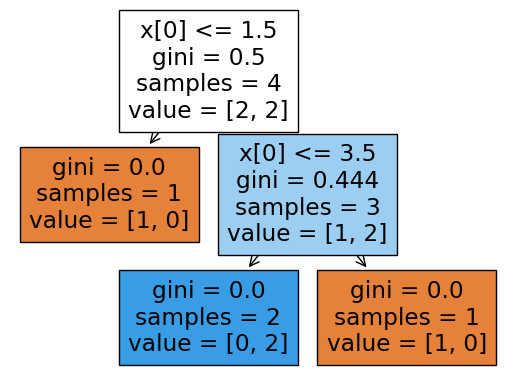

In [122]:
plot_tree(tree, filled=True)
plt.show()

**PREDICTING NEW CASES:**

The process of obtaining the prediction for a new case follows the following steps:

1. Verifies if the new case satisfies the logical condition in the **first node** of the tree (the tree root).

2. If the new case satisfies the said logical condition, let us go to the **left** and come to the next node of the tree.

3. If the new case does not satisfy the said logical condition, let us go **right** and reach the next node of the tree.

4. In the reached node, the respective logical condition is verified against the new case and the process is repeated again and again until a **terminal node** (tree leaf) is reached.

5. In the reached tree leaf, the **majority class** will be taken by the tree prediction for the new case.

**EXAMPLE:**

(X1=3, X2=4)

Since X1 does not satisfy the logical condition (X1 <= 1.5) of the root, we go to the right.

The logical condition in the reached node is satisfied by the new case (X1 <= 3.5). 

We take the left and reach a leaf of the tree. The majority class in the reached leaf is 1 and therefore the prediction for the new case is 1.

[0,2] means that there are zero elements of class 0 and 2 of class 1.

We can obtain the same prediction by using Python:

In [123]:
X_new = pd.DataFrame({
    'X1': [3],
    'X2': [4]}
    )

In [124]:
tree.predict(X_new)

array([1])

We obtain the same result.

# **2.THE ALGORITHM FOR REGRESSION**

The goal of the regression tree is also to partition the feature space into regions that are as homogeneous as possible in terms of the target variable. Therefore, the **algorithm works similarly** to the one used for classification. At each node of the tree, we split the data based on the value of one of the features - X1 or X2, and we assign a predicted value to each region defined by the split. The predicted value for a region is simply the mean value of the target variable for the samples in that region.

Instead of the Gini Index, for **regression problems** we will use the **MSE (Mean Squared Error)**. 

We can use the **MSE** as a **measure of the quality of the split**, and we want to minimize it at each step of the tree construction. Here’s how we can calculate the MSE for a split:

1. Calculate the mean target value for each subset resulting from the split (we divide the set into two subsets and then, for each one of them, we calculate the mean of the outcome variable).

2. Calculate the MSE for each subset as the average squared difference between the
target values and their corresponding mean value (we need to calculate the MSE for each one of the subsets)

3. Calculate the overall MSE for the split as the weighted sum of the MSEs for each subset, where the weights are the proportions of samples in each subset relative to the total number of samples.

Let's now consider the following tiny dataset, to illustrate how the algorithm works mannualy.

In [125]:
df=pd.read_excel('/content/tree_regression_example01.xlsx')
df

,X1,X2,Y
0,2,1.0,10
1,3,1.5,10
2,4,2.0,12
3,5,3.0,18


We start by calculating the MSE for each possible split in the predictor X1:

* **Split at X1 = 2.5:**

We will have two subsets: the first one with 1 data point with Y=10 and another
one with 3 data points, with Y=10, Y=12 and Y= 18, respectively, which yields
Y_barra = 10 for the first subset and Y_barra ≈ 13.33 for the second one. The MSE is given by:

proportion of elements in the first subset * MSE(S1) + proportion of elements in the second subset * MSE(S2) = 8.66

where MSE(S1) is:

1 * [(10-10)²] = 0

and MSE(S2) is:

(1/3) * [(10-13.33)²+(12-13.33)²+(18-13.33)²] = 11.55

* **Split at X1 = 3.5:**

Overall MSE = 4.5

* **Split at X1 = 4.5:**

Overall MSE = 0.33

We can therefore select, as the first split of the tree, the midpoint X1 = 4.5 – it corresponds to the **lowest overall mean squared error**.

When X1 > 4.5, the resulting subset has only an element (18), and, consequently, there is no need to proceed further with splits in that direction – we cannot improve further the subset.

The set associated to X1 <= 4.5 is the first three lines.

We can now start by calculating the MSE for each possible split in the predictor X1:

* **Split at X1 = 2.5:**

Overall MSE = 0.66

* **Split at X1 = 3.5:**

Overall MSE = 0 (since both subsets are pure)

Consequently, the second split of the tree will be at the midpoint X1 = 3.5 – it corresponds to the lowest overall MSE.

The splits in predictor X2 lead to similar MSE. Therefore, we do not need to examine them. Otherwise, we should also study the splits on X2 (actually, on all predictors, if there were more than two predictors).

# PYTHON IMPLEMENTATION

We can obtain the same **regression tree** by using Python:

In [126]:
from sklearn.tree import DecisionTreeRegressor

In [127]:
X = df.drop('Y', axis=1)
y = df['Y']

In [128]:
tree = DecisionTreeRegressor(random_state=45) #random_state controls randomness and therefore we get always the same tree
tree.fit(X,y)

DecisionTreeRegressor(random_state=45)

In [129]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

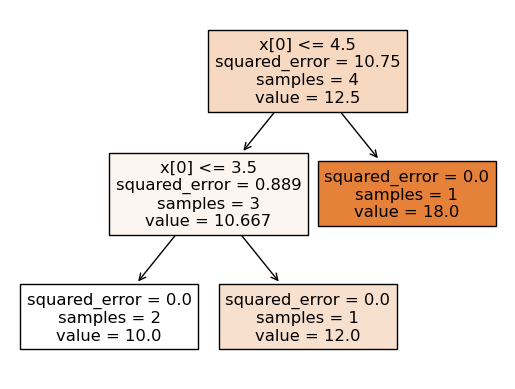

In [130]:
plot_tree(tree, filled=True)
plt.show()

**PREDICTING NEW CASES:**

The process of obtaining the prediction for a new case follows similar steps as with a classification tree, except that the **prediction taken from the leaves is the value of the leaf** (mean of the outcome variable associated with the leaf).

Before we have an interval of numbers [0,1] and now we have the values itself.

**EXAMPLE:**

(X1=4, X2=3)

Since X1 satisfies the logical condition of the root (x[0] <=  4.5), we go to the left.

The logical condition in the reached node is not satisfied by the new case (X1 <= 3.5).

We take the right and reach a leaf of the tree. The value in the reached leaf is 12 and therefore the **prediction for the new case is 12**.

We can obtain the same prediction by using Python:

In [131]:
X_new=pd.DataFrame({
    'X1': [4],
    'X2': [3]}
)

In [132]:
tree.predict(X_new)

array([12.])

We obtain the same result.

# **EX1 - BANK MARKETING CAMPAIGN**

**Classification problem, an example of overfitting problem, imabalance dataset and receiver operating characteristic**



In [133]:
df = pd.read_csv('/content/bank_mark_campaign.csv', sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


**TREATMENT OF DATA:**


In [134]:
import numpy as np

In [135]:
df = df.replace('unknown', np.nan) 

In [136]:
col_nan = df.columns[df.isna().any(axis=0)].to_list()

In [137]:
col_num = df.describe().columns.to_list()

In [138]:
col_cat = df.columns.difference(col_nan + col_num + ['y']).to_list()

In [139]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In this following pipeline, there are two steps:

1. `SimpleImputer(strategy='most_frequent')`: This step uses the SimpleImputer class from scikit-learn to handle missing values in the data. It replaces missing values with the most frequent value from the respective feature. The strategy parameter is set to 'most_frequent' to indicate this behavior.

2. `OneHotEncoder(drop='first')`: This step uses the OneHotEncoder class from scikit-learn to perform one-hot encoding on the categorical features. One-hot encoding is a common technique used to represent categorical variables as binary vectors. The drop parameter is set to 'first', which means the first category of each feature will be dropped to avoid multicollinearity issues.

In [140]:
na_treat = Pipeline([
    ('imp', SimpleImputer(strategy='most_frequent')),
    ('oneh', OneHotEncoder(drop='first'))])

In [141]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [142]:
preprocessor = ColumnTransformer([
    ('na_tr', na_treat, col_nan),
    ('cat_tr', OneHotEncoder(drop='first'), col_cat),
    ('scale_tr', StandardScaler(), col_num)], 
    remainder='passthrough')

In [143]:
from sklearn.tree import DecisionTreeClassifier

In [144]:
pipe = Pipeline([
    ('pre', preprocessor),
    ('tree', DecisionTreeClassifier())])

In [145]:
X = df.drop('y', axis=1)
y = df['y']

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [148]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('na_tr',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneh',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan']),
                                                 ('cat_tr',
                                                  OneHotEncoder(drop='first'),
                                                  ['contact', 'day_of_week',
                                                   'month', 'poutcome']),
                                                 ('scale_tr', StandardScaler(),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed'])])),
                ('tree', DecisionTreeClassifier())])

In [149]:
y_pred=pipe.predict(X_train)

In [150]:
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix

In [151]:
acur = accuracy_score(y_train, y_pred)
print(f'Accuracy={acur}')

cm = confusion_matrix(y_train, y_pred, labels=['yes', 'no'])
print(cm)

recall=recall_score(y_train, y_pred, pos_label='yes')
print(f'Recall={recall}')

Accuracy=1.0
[[ 3700     0]
 [    0 29250]]
Recall=1.0


#**OVERFITTING**

As it turns out from the study of the algorithm of tree creation, the trees can grow up to a stage of full purity. A so pure tree will produce perfect predictions for the training set - and this is very problematic. The reason why this is so problematic is that the data usually contain noise, statistical noise, and such a perfect tree will fit the noise and not only the meaningful information of the data - that is **overfitting**.

Since the noise of the test is not the same as coitained in the training set, the result is that the prediction for the test set (and then for real new data) will tend to be very poor - and our tree useless.


The result, for the training set, is 100% of **accuracy** and **recall score**! This means that the noise of the model is also being fit. However, since the noise of the test set (unseen data) is not the same noise as the train set, the predictions with unseen data tend to be poor.

Remember that recall score, also known as sensitivity or true positive rate, is a performance metric used to evaluate the ability of a classification model to identify relevant instances correctly. It is especially useful when dealing with imbalanced datasets, where the proportion of one class is significantly lower than the other. Recall score is calculated
using the following formula: 

Recall = True Positives / (True Positives + False Negatives)

* “True Positives” - instances that the model correctly identified as positive

* “False Negatives” - instances that the model incorrectly identified as
negative when they were actually positive.

The positive class is yes (clients who subscribed), and the negative class is no (clients who didn’t subscribe).

Let us check now the accuracy and the recall score of the model for the test set:


In [152]:
y_pred2=pipe.predict(X_test)

In [153]:
acur = accuracy_score(y_test, y_pred2)
print(f'Accuracy={acur}')

cm = confusion_matrix(y_test, y_pred2, labels=['yes', 'no'])
print(cm)

recall=recall_score(y_test, y_pred2, pos_label='yes')
print(f'Recall={recall}')

Accuracy=0.8866229667394999
[[ 485  455]
 [ 479 6819]]
Recall=0.5159574468085106


It is manifest that **both the accuracy and recall scores dropped considerably for the test set**, especially the recall score, which fall to one-half!

When we face a so sharp discrepancy between the training set and test set regarding the performance of a model, that is a signal that the model is **overfitting**.

The trees tend to overfit beacuse they grow without any constraint and then they will be so pure that they fit the noise so nicely.

As we can see, for the train set the predictive performance of the model is perfect but with the test set is really bad - this is explained by the **overfitting** of the model.


**HOW TO PREVENT OVERFITTING?**

To prevent overfitting, we need to stop the growth of the tree, i.e., impose constraints on the growth of the tree. Alternatively, we need to prune a full-grown tree.

**PRUNE** (podar a árvore) - drawing a tree, a very complex one, in the sense that it has a lot of nodes. To prune means cut down a certain bratch, will allows to eliminate the nodes after.

The complexity of a tree is determined by
the number of terminal nodes (leaves) and the depth of the tree, and, therefore, complex trees are prone to overfitting.


**HYPERPARAMETER:**

There are several **hyperparameters** that we can manipulate, which are later enumerated in a proper section.

Notwithstanding, there is a yperparameter that we can use to control the complexity of the tree, by pruning the tree.

The `ccp_alpha` hyperparameter represents the complexity cost (penalty) added to the model’s error for each additional split.

`Cost-complexity pruning` is a technique that prunes the decision tree by iteratively removing nodes with the smallest increase in overall impurity, while penalizing larger trees based on their complexity. The `ccp_alpha` parameter represents the complexity parameter. By adjusting this parameter, you can control the **trade-off between tree complexity and accuracy**.

It is a non-negative value, where:

* higher values of ccp_alpha => result in more aggressive pruning (smaller and simpler trees with potentially higher bias but lower variance)

* **lower values** => result in less pruning (more complex trees with more nodes with potential to capture more details and complex relationships in the data but it may also increase the risk of overfitting).

If ccp_alpha is set to 0, no pruning will be performed, and the tree will grow to its maximum depth, potentially leading to overfitting.

If ccp_alpha is set to a positive value, the tree will be pruned, and the optimal tree size will be determined based on the **trade-off between the model’s complexity and its performance on the training data**.

The optimal value of ccp_alpha varies depending on the specific problem and dataset.

We can find the best value by using techniques like `cross-validation` or `grid search` to determine the best ccp_alpha value.

REMEMBER: `Cross-validation` is a technique used to evaluate the performance of a machine learning model by partitioning the data into multiple subsets, training the model on some subsets, and evaluating it on the remaining subset.

To search for a good value for ccp_alpha, we can use `grid search`:

In [154]:
hyper = {
    'ccp_alpha': [0.001, 0.01, 0.1, 0.2, 0.5]
}

"ccp" stands for "minimal cost-complexity pruning," which is a technique for reducing the size of a decision tree to avoid overfitting. 

In [155]:
from sklearn.model_selection import GridSearchCV

In [156]:
pipe = Pipeline([
    ('pre', preprocessor),
    ('grid', GridSearchCV(DecisionTreeClassifier(), hyper, cv=5))])

In [157]:
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_train)


In [158]:
acur = accuracy_score(y_train, y_pred)
print(f'Accuracy= {acur}')
cm = confusion_matrix(y_train, y_pred, labels=['yes', 'no'])
print(cm)
recall = recall_score(y_train, y_pred, pos_label='yes')
print(f'Recall= {recall}')

Accuracy= 0.9136267071320182
[[ 1928  1772]
 [ 1074 28176]]
Recall= 0.5210810810810811


Now, the results are not so stellar!

Since we are trying to predic corretly the customers that will accept the deposit, this model is useless as it predicts a lot of positives as negatives (1772).

Recall = % of values 'yes' predicted as 'yes' ("true positives"). Ideal, recall should be close to 1.

In [159]:
1928/(1928+1772)

0.5210810810810811

Let us check whether they are similar to the one obtained by using the test set:

In [160]:
y_pred2 = pipe.predict(X_test)

acur = accuracy_score(y_test, y_pred2)
print(f'Accuracy= {acur}')
cm = confusion_matrix(y_test, y_pred2, labels=['yes', 'no'])
print(cm)
recall = recall_score(y_test, y_pred2, pos_label='yes')
print(f'Recall= {recall}')

Accuracy= 0.9129643117261471
[[ 493  447]
 [ 270 7028]]
Recall= 0.524468085106383


Indeed, now the results for both sets are similar and, therefore, there is no suspicion of overfitting.

**BUT WHY RECALL_SCORE = 0.521?**


In [161]:
y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

The reason for this is that y, the outcome variable, is quite **unbalanced** in the sense that the model will learn a lot more about the NO cases.


# **IMBALANCED DATASETS**

Imbalanced datasets refer to datasets where the distribution of instances across different classes is unequal. In other words, one or more classes have significantly fewer instances compared to others.

This imbalance can lead to biased models that favor the majority class, as they are more inclined to optimize their predictions for the more frequently
occurring class.

This can result in poor performance on the minority class, especially in
applications such as fraud detection, rare disease diagnosis, or spam filtering, where the minority class is often of greater interest.

The dataset that we are using is imbalanced.

The parameter `normalize=True` is to convert the counts to percentages.

In [162]:
y.value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

Only 11% of the cases in the dataset correspond to the yes class. The yes class is the class that interests us most, as we want to predict the customers more likely to accept our marketing campaign (to reduce wasting time with customers that will likely not accept
the campaign).

**HOW TO SOLVE IMBALANCED DATASETS?**

A way to correct the imabalance of y is to give more weight to the minority class. (Python will penalize heavier the wrongly "yes" misclassified).

The `class_weight` parameter in the decision tree classifier is a way to handle imbalanced datasets by assigning different weights to different classes.

It allows you to adjust the
learning process so that the model pays more attention to the minority class during training. This helps mitigate the bias towards the majority class, which may arise when working with imbalanced datasets.

When using the `class_weight` parameter in a decision tree classifier, the algorithm adjusts the splitting criterion (Gini impurity) to consider the class weights. During the tree construction, it seeks to minimize the weighted impurity of each node, making the model more sensitive to the minority class.

The option `class_weight='balanced'` automatically adjusts the class weights based on the number of samples in each class.

Let us try that:



In [163]:
pipe = Pipeline([
    ('pre', preprocessor),
    ('grid', GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), hyper, cv=5))])

In [164]:
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_train)

acur = accuracy_score(y_train, y_pred)
print(f'Accuracy= {acur}')
cm = confusion_matrix(y_train, y_pred, labels=['yes', 'no'])
print(cm)
recall = recall_score(y_train, y_pred, pos_label='yes')
print(f'Recall= {recall}')

Accuracy= 0.8877086494688923
[[    0  3700]
 [    0 29250]]
Recall= 0.0


Surprisingly, the situation not only did not improve – it has got much worse, as the recall score is zero!

Consequently, we have to look for new ways to improve the recall score.

Using the **receiver operating Characteristic curve** is a possibility.

# **RECEIVER OPERATING CHARACTERISTIC**

In a binary classification problem, a model generates a probability score for each instance to predict its class. This probability score is then compared to a classification threshold to assign the instance to either the positive or negative class.

The classification threshold is a value between 0 and 1 that determines the boundary between the two classes. By default, the **threshold**(limiar) is typically set to 0.5, which means that instances with a **probability score above 0.5 are classified as the positive class**, and **those with a score below 0.5 are classified as the negative class.**

* ROC (Receiver Operating Characteristic) curve - graphical representation of this
relationship, plotting the true positive rate (TPR) against the false positive rate (FPR) at various classification thresholds.

* True Positive Rate (TPR) ou **Recall_Score** - proportion of actual positive cases that are correctly identified by the model:

TPR = True Positives / (True Positives + False Negatives)

* False Positive Rate (FPR) - proportion of actual negative cases that are incorrectly identified as positive by the model:

FPR = False Positives / (False Positives + True Negatives).

The area under the ROC curve (AUC-ROC) is a popular metric used to evaluate the
overall performance of a binary classifier, with higher AUC-ROC values indicating better classification performance.

An ideal binary classifier would correspond to a unitary AUCROC,
as, for each value of the False Positive Rate, the True Positive Rate would be
always 1 (the maximum possible).

Therefore, maximizing the AUC-ROC is a way to improve the overall performance of the classifier and increase the recall of the model, especially in imbalanced datasets where the positive class is rare and more difficult to detect.

**GRIDSEARCHCV OPTIMIZING GOAL:**

Fortunately, we can change the GridSearchCV’s **optimizing goal**: Instead of using the accuracy score (the default option), we can use the `roc_auc` score, in the expectation that, by thus proceeding, we are optimizing the recall score, by changing the level of the complexity of the tree (by trying different values for the parameter ccp_alpha).

So, we will change the goal of the grid search by changing the scoring to "roc_auc" (Area Under the Receiver Operating Characteristic Curve).

**ROC Curve:**

The ROC curve is used in binary classification problems.

We try that now:

In [165]:
pipe = Pipeline([
    ('pre', preprocessor),
    ('grid', GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), hyper, cv=5, scoring='roc_auc'))])

In [166]:
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_train)

In [167]:
acur = accuracy_score(y_train, y_pred)
print(f'Accuracy= {acur}')
cm = confusion_matrix(y_train, y_pred, labels=['yes', 'no'])
print(cm)
recall = recall_score(y_train, y_pred, pos_label='yes')
print(f'Recall= {recall}')

Accuracy= 0.8336874051593324
[[ 3519   181]
 [ 5299 23951]]
Recall= 0.951081081081081


The results appear to be fantastic: The recall score is about 95% for the training set!

As we can see, the recall_score increased a lot. Even though the number of 'no' predicted as 'yes' increased, the most important is that the number of 'yes' predicted as 'no' decreased! This can help the bank make more efficient decisions calling the customers most likely to say 'yes' only!

However, we still have to check whether the recall score is similar when using the test set.

In [168]:
y_pred2 = pipe.predict(X_test)
acur = accuracy_score(y_test, y_pred2)
print(f'Accuracy= {acur}')
cm = confusion_matrix(y_test, y_pred2, labels=['yes', 'no'])
print(cm)
recall = recall_score(y_test, y_pred2, pos_label='yes')
print(f'Recall= {recall}')

Accuracy= 0.8319980577810148
[[ 873   67]
 [1317 5981]]
Recall= 0.9287234042553192


The results are also great! And now we have a good prediction model that will not miss many potential yes cases, saving a lot of time and effort for the bank, that we will contact only a small fraction of its customers (and not all of them), where almost all customers,
that are most likely to accept the marketing campaign, are.

#**ANOTHERS HYPERPARAMENTERS**

Some examples of hyperparameteres, that can be adjusted to control the growth and structure of a decision tree model, are:

* `max_depth` - This controls the maximum depth of the tree. The default value is None, which means the tree is grown until all leaves are pure or until all leaves contain less `min_samples_split`.

* `min_samples_split` - This specifies the minimum number of samples required to split an internal node. The default value is 2.

* `min_samples_leaf` - This specifies the number of samples required to be at a leaf node. The default value is 1.

* `max_leaf_nodes` - This sets the maximum number of leaf nodes in the tree. The default is None, which means the number of leaf nodes is not constrained.

* `criterion` - This specifies the impurity criterion used to measure the quality of a split. The default value is `gini`, but `entropy` can also be used.

These hyperparameters can be set when initializing the `DecisionTreeClassifier` or `DecisionTreeRegressor` object in `scikit-learn`.

In [169]:
hyper = {
    'ccp_alpha': [0.001, 0.01, 0.1, 0.2, 0.5],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [None, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [170]:
pipe = Pipeline([
    ('pre', preprocessor),
    ('grid', GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), hyper, cv=5, scoring='roc_auc'))])

pipe.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('na_tr',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneh',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan']),
                                                 ('cat_tr',
                                                  OneHotEncoder(drop='first'),
                                                  ['contact', 'day_of_week',
                                                   'month', 'poutcome']),
                                                 ('scale_tr', Stand...
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed'])])),
                ('grid',
                 GridSearchCV(cv=5,
                              estimator=DecisionTreeClassifier(class_weight='balanced'),
                              param_grid={'ccp_alpha': [0.001, 0.01, 0.1, 0.2,
                                                        0.5],
                                          'criterion': ['gini', 'entropy'],
                                          'max_depth': [None, 5, 10, 20],
                                          'max_leaf_nodes': [None, 5, 10],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [2, 5, 10]},
                              scoring='roc_auc'))])

In [171]:
y_pred = pipe.predict(X_train)

acur = accuracy_score(y_train, y_pred)
print(f'Accuracy= {acur}')
cm = confusion_matrix(y_train, y_pred, labels=['yes', 'no'])
print(cm)
recall = recall_score(y_train, y_pred, pos_label='yes')
print(f'Recall= {recall}')

Accuracy= 0.8636722306525038
[[ 3424   276]
 [ 4216 25034]]
Recall= 0.9254054054054054


# **EX2 - DEFECTIVE CAR RADIOS**

**Regression problem** 

In [93]:
import pandas as pd
import numpy as np
import datetime

df = pd.read_excel('/content/data_carradios.xlsx')

def get_ages(col):
  result = (datetime.datetime.now()-col).astype('<m8[Y]')
  result = pd.DataFrame(result)
  return result

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler

ager = Pipeline([
    ('ages', FunctionTransformer(get_ages, feature_names_out='one-to-one')),
    ('scale', StandardScaler())
])

def get_weekdays(col):
  result = col.iloc[:,0].dt.weekday
  result = pd.DataFrame(result)
  return result

from sklearn.preprocessing import OneHotEncoder

weeker = Pipeline([
    ('weekd', FunctionTransformer(get_weekdays, feature_names_out='one-to-one')),
    ('oneh', OneHotEncoder(drop='first'))
])

from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('ages_tr', ager, ['bdate']),
    ('weekd_tr', weeker, ['datep']),
    ('team_tr', OneHotEncoder(drop='first'), ['team']),
    ('scaler', StandardScaler(), ['prized', 'prizeq'])],
    remainder='passthrough')

In [86]:
X = df.drop('perc_defec', axis=1)
y = df['perc_defec']

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [94]:
from sklearn.tree import DecisionTreeRegressor

pipe = Pipeline([
    ('pre', preprocessor),
    ('tree', DecisionTreeRegressor())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ages_tr',
                                                  Pipeline(steps=[('ages',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<function get_ages at 0x7f784df0ab00>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['bdate']),
                                                 ('weekd_tr',
                                                  Pipeline(steps=[('weekd',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<function get_weekdays at 0x7f784df0b370>)),
                                                                  ('oneh',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['datep']),
                                                 ('team_tr',
                                                  OneHotEncoder(drop='first'),
                                                  ['team']),
                                                 ('scaler', StandardScaler(),
                                                  ['prized', 'prizeq'])])),
                ('tree', DecisionTreeRegressor())])

In [97]:
#predictive performance of the model in the train set
y_pred = pipe.predict(X_train)

r2 = r2_score(y_train, y_pred)
print(f'R2= {r2}')

mae = mean_absolute_error(y_train, y_pred)
print(f'MAE= {mae}')

rmse = mean_squared_error(y_train, y_pred, squared=False)
print(f'RMSE= {rmse}')

R2= 0.940571315604777
MAE= 2.6502624234792984
RMSE= 3.676162025277643


In [98]:
#predictive performance of the model in the test set
y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f'R2= {r2}')

mae = mean_absolute_error(y_test, y_pred)
print(f'MAE= {mae}')

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE= {rmse}')

R2= 0.8846262266400601
MAE= 3.9040616774891777
RMSE= 5.212007208008061


The predictive performance for both sets (training and test) is similar, still let's see the optimization of the hyperparameter `ccp_alpha`.

In [107]:
hyper = {
    'ccp_alpha': [0.001, 0.01, 0.1, 0.2, 0.5]
}

from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ('pre', preprocessor),
    ('grid', GridSearchCV(DecisionTreeRegressor(), hyper, cv=5))])

pipe.fit(X_train, y_train)

In [103]:
#predictive performance of the model in the train set
y_pred = pipe.predict(X_train)

r2 = r2_score(y_train, y_pred)
print(f'R2= {r2}')

mae = mean_absolute_error(y_train, y_pred)
print(f'MAE= {mae}')

rmse = mean_squared_error(y_train, y_pred, squared=False)
print(f'RMSE= {rmse}')

R2= 0.9197521852026403
MAE= 3.2898610178578025
RMSE= 4.271822451632366


In [104]:
#predictive performance of the model in the test set
y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f'R2= {r2}')

mae = mean_absolute_error(y_test, y_pred)
print(f'MAE= {mae}')

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE= {rmse}')

R2= 0.8971487666569046
MAE= 3.6986164844013856
RMSE= 4.921032250811609
